#Inport libraries and pip install

In [1]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 12.8 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.2.0-py3-none-any.whl size=158196 sha256=a3d2c0636ff9baeaded57f013c065794dcb7f9debaf117de49c59f48abd0474f
  Stored in directory: /root/.cache/pip/wheels/5a/b5/4e/216953a1c711da55de29ed7ecf158b4a5bf32ef93d69ad66dd
Successfully built fugue-sql-antlr


In [2]:
%%capture
! pip install git+https://github.com/Nixtla/neuralforecast.git@main

In [3]:
!pip install Pytorch lightning

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for Pytorch
  Running setup.py clean for Pytorch
Failed to build Pytorch
ERROR: Could not build wheels for Pytorch, which is required to install pyproject.toml-based projects


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
from ray import tune

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS, AutoLSTM
from neuralforecast.losses.pytorch import MQLoss

In [6]:
from statsforecast import StatsForecast

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# Import data

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/SigneByrith/Projekt/main/JNJ.csv')

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,71.019997,71.019997,70.300003,70.839996,52.369576,12874200
1,2013-01-03,70.980003,71.000000,70.449997,70.739998,52.295673,9598300
2,2013-01-04,71.239998,71.730003,71.010002,71.550003,52.894466,11631800
3,2013-01-07,71.500000,71.529999,71.190002,71.400002,52.783596,7548800
4,2013-01-08,71.309998,71.650002,71.250000,71.410004,52.790981,9825300


We are intresset to perform a LSTM using the "Close" which is the closing prices of the stock

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [12]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2013-01-02,70.839996
1,2013-01-03,70.739998
2,2013-01-04,71.550003
3,2013-01-07,71.400002
4,2013-01-08,71.410004
...,...,...
2513,2022-12-23,177.479996
2514,2022-12-27,177.429993
2515,2022-12-28,176.660004
2516,2022-12-29,177.559998


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2518 non-null   object 
 1   Close   2518 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


#Dataframe

To use the NeauralForecast models we will need three feature; unique_id, which is an unique identifier for a specific time series, ds, which is the datestamp. When using the "ds" it is important that the dtype is either an intiger or a time series data, and lastly the "y", which is the values of the series

Firstly we make a "unique_id" column for the time series. Moreover, we rename the "Date" and "Close" column from above to "ds" and "y"

In [14]:
df["unique_id"]="1"
df.columns=["ds","y","unique_id"]
df.head()

,ds,y,unique_id
0,2013-01-02,70.839996,1
1,2013-01-03,70.739998,1
2,2013-01-04,71.550003,1
3,2013-01-07,71.400002,1
4,2013-01-08,71.410004,1


Next we make the "ds" feature into a integer

In [15]:
df['ds']= [indx+1 for indx in df.index.to_list()]

In [16]:
df = df[['unique_id', 'ds', 'y']]

In [17]:
df

,unique_id,ds,y
0,1,1,70.839996
1,1,2,70.739998
2,1,3,71.550003
3,1,4,71.400002
4,1,5,71.410004
...,...,...,...
2513,1,2514,177.479996
2514,1,2515,177.429993
2515,1,2516,176.660004
2516,1,2517,177.559998


Now we check the "dtype" of the dataframe to se if there is a need to change the feature further

In [18]:
df.dtypes

unique_id     object
ds             int64
y            float64
dtype: object

In [19]:
df.dtypes

unique_id     object
ds             int64
y            float64
dtype: object

We now have the dataframe that we are going to work with in the rest of the colab

In [20]:
Y_df = df

In [21]:
Y_df.shape

(2518, 3)

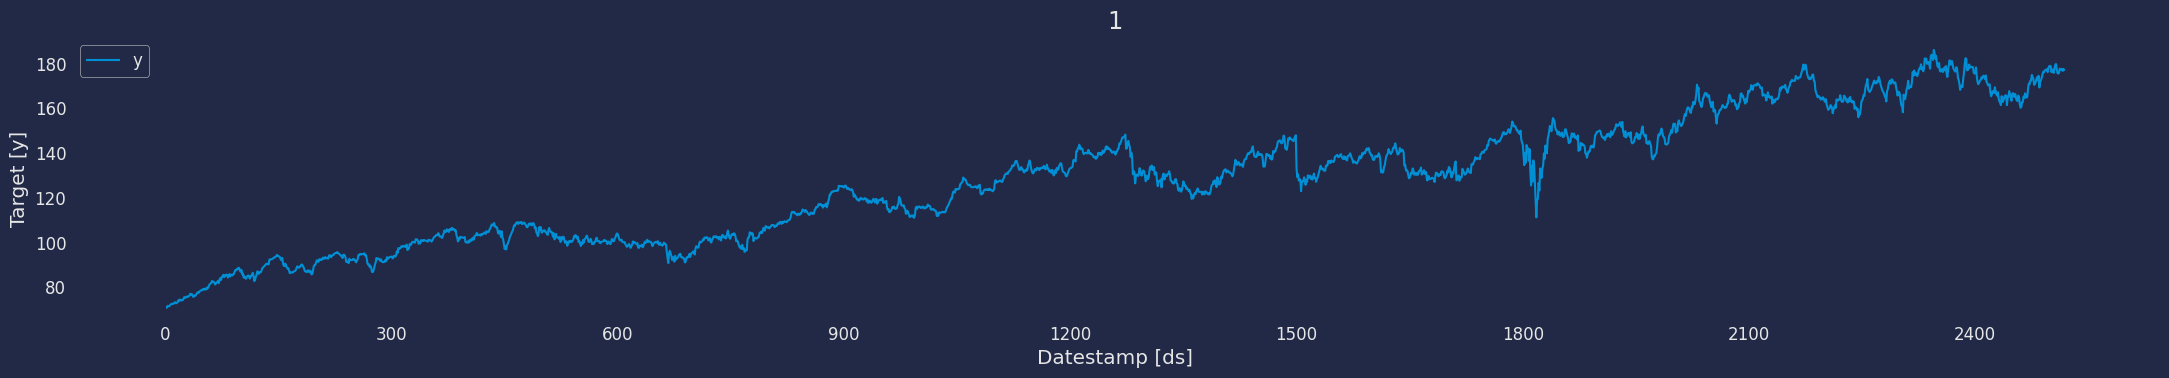

In [22]:
StatsForecast.plot(Y_df, engine="matplotlib")

# Hyperparameter Optimization

When working with Deep learning the performance of the models depends on the choice of hyperparameters included. In this step we will look at how the hyperparametric tuning can be done by a AutoLSTM using the NeuralForecast library

Firstly will we import the "tune" from the "ray" library. Any of the Auto models made avaliable from the neuralforecast library has default search space , that can be personalized.

In [23]:
from ray import tune

from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS, AutoLSTM
from neuralforecast.losses.pytorch import MQLoss

In [24]:


config_lstm = {
    "encoder_hidden_size": tune.choice([2, 4, 8, 16, 32, 64, 128]), # Hidden size of LSTM cells
    "encoder_n_layers": tune.choice([2,3,4]), # Number of layers in LSTM
    "learning_rate": tune.loguniform(1e-5, 1e-4, 1e-3), # Initial Learning rate
    "scaler_type": tune.choice(['minmax']),  # Scaler type --> has been changed to minmax from "robust"
    "max_steps": tune.choice([10, 25, 50, 75, 100, 500]), # Max number of training iterations --> epochs
    "encoder_dropout": tune.choice([0.1, 0.2, 0.3, 0.4]),  # size of the dropout rate applied to the LSTM output
    "batch_size": tune.choice([32, 64]), # Number of series in batch
    "random_seed": tune.randint(1, 20), # Random seed
}


#Initializing the model

Now that the hyperparameters has been defined we will now set op the AutoLSTM

To do that we will need to define the horcast horizion, h, the train and validation loss, loss, the search algoritm, search_alg, number of confingoration explored, num_samples, and the frequence of the "ds" feature which in this instance is 1

In [25]:
nf = NeuralForecast(
    models=[
        AutoLSTM(h=12, config=config_lstm, loss=MQLoss(), num_samples=20),
    ],
    freq=1
)


# Prediction

Now that we have made the model we would like to perform forecast on, we use the predict medthold to forecast the next 12 days using the optimal hyperparameters

the first step is to fit the model

In [26]:
nf.fit(df=Y_df)

2023-12-11 19:51:39,583	INFO worker.py:1673 -- Started a local Ray instance.
2023-12-11 19:51:43,075	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `Tuner(...)`.
2023-12-11 19:51:43,089	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2023-12-11_19-51-35   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 20                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2023-12-11_19-51-35
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_train_tune_2023-12-11_19-51-35`


(_train_tune pid=970) Seed set to 18
(_train_tune pid=970) 2023-12-11 19:52:13.488821: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(_train_tune pid=970) 2023-12-11 19:52:13.488911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=970) 2023-12-11 19:52:13.488944: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(_train_tune pid=970) 2023-12-11 19:52:15.301063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  3.72it/s, v_num=0, train_loss_step=0.162, train_loss_epoch=0.163]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s, v_num=0, train_loss_step=0.162, train_loss_epoch=0.162, valid_loss=42.70]
Sanity Checking: |          | 0/? [00:00<?, ?it/s]


(_train_tune pid=970) Seed set to 5


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  5.61it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.220]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.219, valid_loss=49.20]


(_train_tune pid=970) Seed set to 6


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  8.19it/s, v_num=0, train_loss_step=0.119, train_loss_epoch=0.120]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  9.54it/s, v_num=0, train_loss_step=0.0702, train_loss_epoch=0.0704, valid_loss=35.50]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  7.93it/s, v_num=0, train_loss_step=0.0514, train_loss_epoch=0.0515, valid_loss=25.20]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  8.22it/s, v_num=0, train_loss_step=0.0461, train_loss_epoch=0.0462, valid_loss=17.50]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  

(_train_tune pid=970) Seed set to 13


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s, v_num=0, train_loss_step=0.243, train_loss_epoch=0.243]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] 


(_train_tune pid=970) Seed set to 18


Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 11.21it/s, v_num=0, train_loss_step=0.262, train_loss_epoch=0.263]
Validation: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=970) Seed set to 1


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s, v_num=0, train_loss_step=0.264, train_loss_epoch=0.265]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  3.67it/s, v_num=0, train_loss_step=0.264, train_loss_epoch=0.264, valid_loss=54.90]


(_train_tune pid=970) Seed set to 11


Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 12.36it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.219]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  7.09it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.219, valid_loss=48.90]


(_train_tune pid=970) Seed set to 2


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s, v_num=0, train_loss_step=0.208, train_loss_epoch=0.209]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 11.82it/s, v_num=0, train_loss_step=0.169, train_loss_epoch=0.170, valid_loss=47.90]
(_train_tune pid=970) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=970) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 11.10it/s, v_num=0, train_loss_step=0.136, train_loss_epoch=0.136, valid_loss=43.00]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  7.11it/s, v_num=0, train_loss_step=0.109, train_loss_epoch=0.110, valid_loss=38.30]
(_train_tune pid=970) 
Validation: |          | 0/? [

(_train_tune pid=970) Seed set to 7


Epoch 74: 100%|██████████| 1/1 [00:00<00:00,  9.06it/s, v_num=0, train_loss_step=0.232, train_loss_epoch=0.232]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 74: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s, v_num=0, train_loss_step=0.232, train_loss_epoch=0.232, valid_loss=51.20]


(_train_tune pid=970) Seed set to 13


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 10.17it/s, v_num=0, train_loss_step=0.128, train_loss_epoch=0.129]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s, v_num=0, train_loss_step=0.128, train_loss_epoch=0.128, valid_loss=37.10]


(_train_tune pid=970) Seed set to 19


Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  9.55it/s, v_num=0, train_loss_step=0.226, train_loss_epoch=0.226]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s, v_num=0, train_loss_step=0.226, train_loss_epoch=0.226, valid_loss=50.10]


(_train_tune pid=970) Seed set to 13


Epoch 9: 100%|██████████| 1/1 [00:00<00:00, 12.34it/s, v_num=0, train_loss_step=0.246, train_loss_epoch=0.246]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  7.99it/s, v_num=0, train_loss_step=0.246, train_loss_epoch=0.246, valid_loss=52.60]


(_train_tune pid=970) Seed set to 17


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  7.15it/s, v_num=0, train_loss_step=0.246, train_loss_epoch=0.246, valid_loss=52.60]
Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  7.46it/s, v_num=0, train_loss_step=0.208, train_loss_epoch=0.208]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] 


(_train_tune pid=970) Seed set to 4


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  9.42it/s, v_num=0, train_loss_step=0.261, train_loss_epoch=0.262]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  5.73it/s, v_num=0, train_loss_step=0.261, train_loss_epoch=0.261, valid_loss=54.50]


(_train_tune pid=970) Seed set to 2


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  8.52it/s, v_num=0, train_loss_step=0.291, train_loss_epoch=0.291]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=970) Seed set to 10


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  7.47it/s, v_num=0, train_loss_step=0.250, train_loss_epoch=0.251]
Validation: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=970) Seed set to 13


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  6.95it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.220]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  4.28it/s, v_num=0, train_loss_step=0.219, train_loss_epoch=0.219, valid_loss=49.60]
Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=970) Seed set to 11


Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  7.90it/s, v_num=0, train_loss_step=0.227, train_loss_epoch=0.227]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0:   0%|          | 0/1 [00:00<?, ?it/s] 


(_train_tune pid=970) Seed set to 3


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  8.71it/s, v_num=0, train_loss_step=0.282, train_loss_epoch=0.283]
Validation: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=970) Seed set to 1


Epoch 74: 100%|██████████| 1/1 [00:00<00:00,  4.09it/s, v_num=0, train_loss_step=0.244, train_loss_epoch=0.244]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=970) 
Epoch 74: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s, v_num=0, train_loss_step=0.244, train_loss_epoch=0.244, valid_loss=52.40]



INFO:lightning_fabric.utilities.seed:Seed set to 6


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Secoundly, we predict it, and create a dataframe that contains the values from the AutoLSTM, and the the AutoLSTM with different interval

In [27]:
fcst_df = nf.predict()
fcst_df.columns = fcst_df.columns.str.replace('-median', '') # this part of the code changes the names of the column in the dataframe. It removes the names of the columns in the dataframe that has "median" in its name
fcst_df.head()

Predicting: |          | 0/? [00:00<?, ?it/s]

,ds,AutoLSTM,AutoLSTM-lo-90,AutoLSTM-lo-80,AutoLSTM-hi-80,AutoLSTM-hi-90
unique_id,,,,,,
1,2519,131.941193,86.276016,93.654633,170.445877,176.822952
1,2520,131.449524,86.613510,92.677292,157.793945,167.459259
1,2521,127.164024,86.506165,92.936089,147.814148,162.458984
1,2522,131.200211,86.603371,93.105949,162.119568,169.520706
1,2523,127.943161,86.819839,92.826210,168.925278,179.084564


We now visualize the forecast we have created

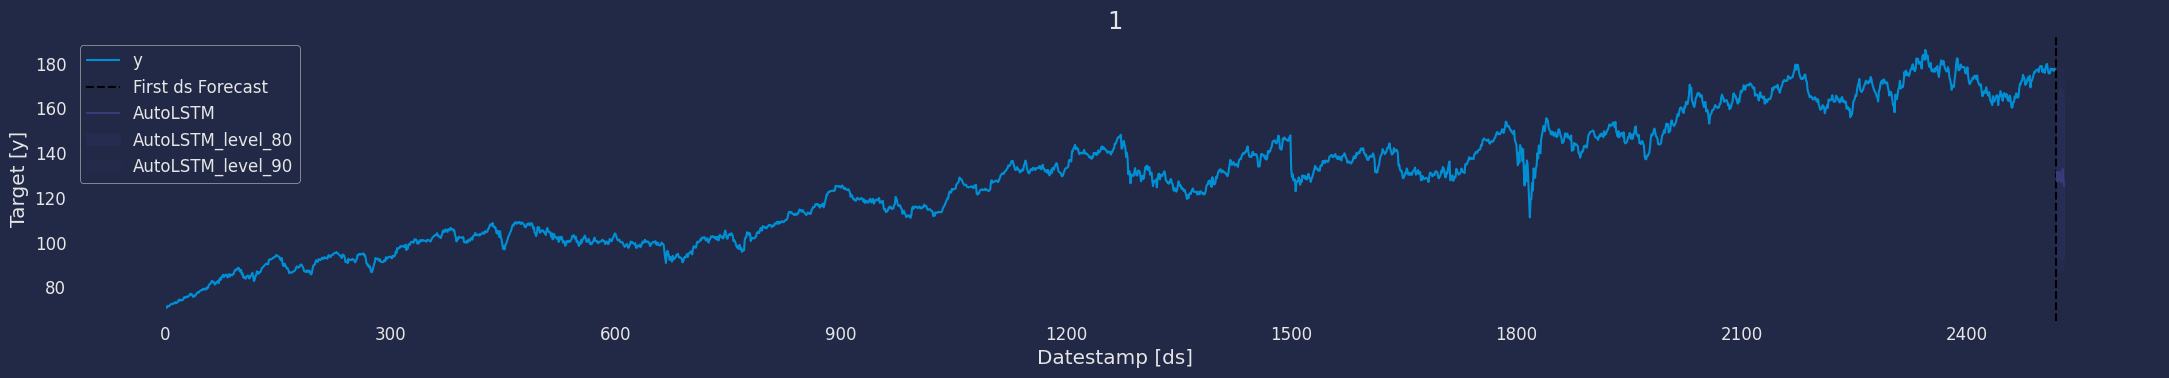

In [28]:
StatsForecast.plot(Y_df, fcst_df, engine='matplotlib', level=[80, 90])

# Validation

We will now like to asses the accuray of the prediction we have made. This is done by performing cross-validation, given that this allso will give us an insight on have the model would have performed in the past

This is done be defining a slifing window across the data og prediction the period following it. This allow us to arrive at a better estimation of how good our model is to predict across a larger range, while still keeping th edata in the training set contiguous as is requried by our model

To do this procedure we use the cross_validation method from the NeuralForecast. To do this uptimal it is possible to use the following arguments: we have to define the dataframe, df, we can chose the step_size, which is the step size between each of the windows created, and the windows, n_window, whcih is the number of windows used in the cross validation

In [29]:
cv_df = nf.cross_validation(Y_df, n_windows=5)


2023-12-11 19:57:19,673	INFO tune.py:595 -- [output] This will use the new output engine with verbosity 0. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+--------------------------------------------------------------------+
| Configuration for experiment     _train_tune_2023-12-11_19-57-19   |
+--------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator             |
| Scheduler                        FIFOScheduler                     |
| Number of trials                 20                                |
+--------------------------------------------------------------------+

View detailed results here: /root/ray_results/_train_tune_2023-12-11_19-57-19
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_train_tune_2023-12-11_19-57-19`


(_train_tune pid=2441) Seed set to 11
(_train_tune pid=2441) 2023-12-11 19:57:30.196511: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
(_train_tune pid=2441) 2023-12-11 19:57:30.196614: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
(_train_tune pid=2441) 2023-12-11 19:57:30.196647: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
(_train_tune pid=2441) 2023-12-11 19:57:32.325158: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  8.67it/s, v_num=0, train_loss_step=0.223, train_loss_epoch=0.223]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  5.44it/s, v_num=0, train_loss_step=0.223, train_loss_epoch=0.223, valid_loss=49.90]


(_train_tune pid=2441) Seed set to 16


Epoch 74: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s, v_num=0, train_loss_step=0.222, train_loss_epoch=0.222]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 74: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s, v_num=0, train_loss_step=0.222, train_loss_epoch=0.222, valid_loss=49.10]


(_train_tune pid=2441) Seed set to 13


Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  7.61it/s, v_num=0, train_loss_step=0.228, train_loss_epoch=0.229]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  3.99it/s, v_num=0, train_loss_step=0.228, train_loss_epoch=0.228, valid_loss=50.60]


(_train_tune pid=2441) Seed set to 19


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  7.44it/s, v_num=0, train_loss_step=0.242, train_loss_epoch=0.242]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  4.64it/s, v_num=0, train_loss_step=0.242, train_loss_epoch=0.242, valid_loss=52.50]


(_train_tune pid=2441) Seed set to 17


Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 12.37it/s, v_num=0, train_loss_step=0.153, train_loss_epoch=0.154]
(_train_tune pid=2441) 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=2441) Seed set to 12


(_train_tune pid=2441) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s, v_num=0, train_loss_step=0.243, train_loss_epoch=0.244]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  6.49it/s, v_num=0, train_loss_step=0.198, train_loss_epoch=0.198, valid_loss=52.90]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 12.10it/s, v_num=0, train_loss_step=0.152, train_loss_epoch=0.152, valid_loss=47.50]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s, v_num=0, train_loss_step=0.112, train_loss_epoch=0.112, valid_loss=41.70]
(_train_tune pid=2441) 
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=2441) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  7.39it/s, v_num=0, train_loss_step=0.0785, train_loss_epoch=0.0788, valid_loss=35.20]
Validation: |      

(_train_tune pid=2441) Seed set to 11


(_train_tune pid=2441) 
Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  5.68it/s, v_num=0, train_loss_step=0.228, train_loss_epoch=0.228]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=2441) Seed set to 4


(_train_tune pid=2441) 
Epoch 74: 100%|██████████| 1/1 [00:00<00:00,  9.48it/s, v_num=0, train_loss_step=0.218, train_loss_epoch=0.218]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 74: 100%|██████████| 1/1 [00:00<00:00,  5.23it/s, v_num=0, train_loss_step=0.218, train_loss_epoch=0.218, valid_loss=50.30]


(_train_tune pid=2441) Seed set to 4


Epoch 9: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s, v_num=0, train_loss_step=0.252, train_loss_epoch=0.252]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=2441) Seed set to 16


(_train_tune pid=2441) 
Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s, v_num=0, train_loss_step=0.233, train_loss_epoch=0.233]
Validation: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=2441) Seed set to 17


Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  5.87it/s, v_num=0, train_loss_step=0.263, train_loss_epoch=0.263]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s, v_num=0, train_loss_step=0.263, train_loss_epoch=0.263, valid_loss=55.20]


(_train_tune pid=2441) Seed set to 19


Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  4.47it/s, v_num=0, train_loss_step=0.249, train_loss_epoch=0.249]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 24: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s, v_num=0, train_loss_step=0.249, train_loss_epoch=0.249, valid_loss=53.70]


(_train_tune pid=2441) Seed set to 18


Epoch 49: 100%|██████████| 1/1 [00:00<00:00, 10.22it/s, v_num=0, train_loss_step=0.237, train_loss_epoch=0.238]
Validation: |          | 0/? [00:00<?, ?it/s]
Sanity Checking DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=2441) Seed set to 15


Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s, v_num=0, train_loss_step=0.192, train_loss_epoch=0.193]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s, v_num=0, train_loss_step=0.192, train_loss_epoch=0.192, valid_loss=46.70]


(_train_tune pid=2441) Seed set to 7


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  9.29it/s, v_num=0, train_loss_step=0.278, train_loss_epoch=0.278]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  5.65it/s, v_num=0, train_loss_step=0.278, train_loss_epoch=0.278, valid_loss=56.70]


(_train_tune pid=2441) Seed set to 13


Epoch 49: 100%|██████████| 1/1 [00:00<00:00,  7.83it/s, v_num=0, train_loss_step=0.210, train_loss_epoch=0.210]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=2441) Seed set to 13


(_train_tune pid=2441) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s, v_num=0, train_loss_step=0.237, train_loss_epoch=0.237]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s, v_num=0, train_loss_step=0.207, train_loss_epoch=0.208, valid_loss=52.20]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s, v_num=0, train_loss_step=0.0689, train_loss_epoch=0.0695, valid_loss=48.60]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s, v_num=0, train_loss_step=0.0472, train_loss_epoch=0.0472, valid_loss=23.60]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 

(_train_tune pid=2441) Seed set to 9


(_train_tune pid=2441) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  9.38it/s, v_num=0, train_loss_step=0.187, train_loss_epoch=0.187]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  8.53it/s, v_num=0, train_loss_step=0.137, train_loss_epoch=0.138, valid_loss=45.90]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 11.01it/s, v_num=0, train_loss_step=0.100, train_loss_epoch=0.100, valid_loss=38.90]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=2441) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 10.63it/s, v_num=0, train_loss_step=0.0739, train_loss_epoch=0.0741, valid_loss=32.20]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 12.29it/s, v_num=0, train_loss_step=0.0584, train_loss_epoch=0.05

(_train_tune pid=2441) Seed set to 16


(_train_tune pid=2441) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  5.92it/s, v_num=0, train_loss_step=0.215, train_loss_epoch=0.216]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


(_train_tune pid=2441) Seed set to 17


(_train_tune pid=2441) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  6.46it/s, v_num=0, train_loss_step=0.174, train_loss_epoch=0.175]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]


INFO:lightning_fabric.utilities.seed:Seed set to 13


(_train_tune pid=2441) 
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  4.05it/s, v_num=0, train_loss_step=0.174, train_loss_epoch=0.174, valid_loss=44.30]



Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [30]:
cv_df.columns = cv_df.columns.str.replace('-median', '')


In [31]:
cv_df.head()


,ds,cutoff,AutoLSTM,AutoLSTM-lo-90,AutoLSTM-lo-80,AutoLSTM-hi-80,AutoLSTM-hi-90,y
unique_id,,,,,,,,
1,2503,2502,127.668106,86.628670,91.438820,174.271393,175.004761,177.199997
1,2504,2502,133.911957,89.841118,91.662651,167.372803,166.996307,175.740005
1,2505,2502,131.382324,92.725403,95.606865,164.073425,175.040314,177.839996
1,2506,2502,134.924927,93.217972,91.839088,166.703644,164.920624,179.210007
1,2507,2502,132.274963,81.316895,98.500046,178.583771,167.260269,179.759995


In [32]:
for cutoff in cv_df['cutoff'].unique():
    StatsForecast.plot(
        Y_df,
        cv_df.query('cutoff == @cutoff').drop(columns=['y', 'cutoff']),
        max_insample_length=48 * 4,
        unique_ids=['1'],
        engine='matplotlib'
    )


## evaluation

In [33]:
!pip install datasetsforecast

In [34]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape
from datasetsforecast.evaluation import accuracy


In [35]:
cv_df_backup = cv_df

In [36]:
cv_df.reset_index(inplace=True)

In this section we choose the evaluation metrics we would like to use

In [37]:
evaluation_df = accuracy(cv_df, [mae, mape, rmse, smape], agg_by=['unique_id'])


In [38]:

evaluation_df['best_model'] = evaluation_df.drop(columns=['metric', 'unique_id']).idxmin(axis=1)
evaluation_df.head()


,metric,unique_id,AutoLSTM,best_model
0,mae,1,46.146146,AutoLSTM
1,mape,1,26.038992,AutoLSTM
2,rmse,1,46.334000,AutoLSTM
3,smape,1,29.977411,AutoLSTM
